In [1]:
from IPython.display import set_matplotlib_formats
import numpy as np
import matplotlib.pyplot as plt

set_matplotlib_formats('svg')

# Trikotnik Sierpinskega

Začetni trikotnik $T$ je v naš namen vektor oz. seznam oglišč, urejen v nasprotni smeri urinega kazalca

$$
    T =
    \begin{bmatrix}
        A & B & C
    \end{bmatrix}.
$$

In [2]:
α_0 = 0.66
T_0 = np.array([[0, 0], [1, 0], [1, 1 / np.sqrt(2)]])

Za parameter $\alpha$ med $0$ in $1$ definiramo interpolacijo med točkama

$$\alpha(A, B) = (1 - \alpha) A + \alpha B.$$

Z njo izračunamo točke med priležnimi oglišči

$$
    T_{mid} =
    \begin{bmatrix}
        \alpha(A, B) & \alpha(B, C) & \alpha(C, A)
    \end{bmatrix},
$$

In [3]:
T_mid = (1 - α_0) * T_0 + α_0 * np.roll(T_0, -1, axis=0)

Zapišemo matriko, katere vrstice so $T$, $T_{mid}$ in za en element (ciklično) v desno zamaknjen $T_{mid}$

$$
    \begin{bmatrix}
        A & B & C\\
        \alpha(A, B) & \alpha(B, C) & \alpha(C, A)\\
         \alpha(C, A) & \alpha(A, B) & \alpha(B, C)
    \end{bmatrix}.
$$

Vidimo, da so njeni stolpci spet pozitivno orientirani trikotniki, ki skupaj sestavljajo trikotnik Sierpinskega, eno iteracijo nad trikotnikom $T$.

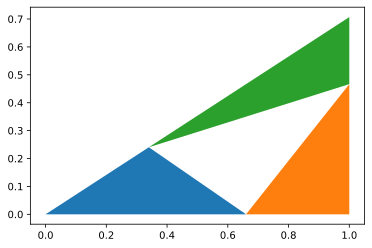

In [4]:
subtris = np.stack(
    [T_0, T_mid, np.roll(T_mid, 1, axis=0)], axis=1)

for t in subtris:
    plt.fill(t.T[0], t.T[1], linewidth=0)

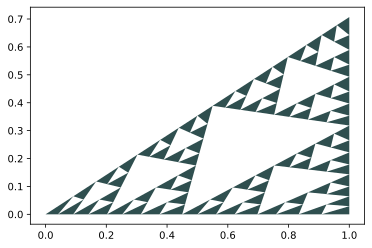

In [5]:
def serpinski_draw(T, α=0.5, n=1):
    if n == 0:
        plt.fill(T.T[0], T.T[1], color='darkslategrey', linewidth=0)
    else:
        T_mid = (1 - α) * T + α * np.roll(T, -1, axis=0)
        subtris = np.stack(
            [T, T_mid, np.roll(T_mid, 1, axis=0)], axis=1)
        [serpinski_draw(t, α, n - 1) for t in subtris]
        
serpinski_draw(T_0, 0.45, 4)

Ploščino trikotika $T$ lahko izračunamo iz vektorskega produkta $\overrightarrow{AB}$ in $\overrightarrow{AC}$. Ker vektorji ležijo v ravnini in so trikotniki vedno pozitivno orientirani, je vsaka izmed ploščin preprosto

$$S = \frac{\overrightarrow{AB} \times \overrightarrow{AC}}{2}$$

In [6]:
def serpinski_S(T, α=0.5, n=2):
    if n == 0:
        return 0.5 * np.cross(T[1] - T[0], T[2] - T[0])
    else:
        T_mid = (1 - α) * T + α * np.roll(T, -1, axis=0)
        subtris = np.stack(
            [T, T_mid, np.roll(T_mid, 1, axis=0)], axis=1)
        return sum([serpinski_S(t, α, n - 1) for t in subtris])

serpinski_S(T_0, 0.66, 6)

0.03290937620324827

In [7]:
n = np.array(range(7))
S = [serpinski_S(T_0, 0.5, i) for i in n]

Pogledamo, kako površina trikotnika pada pri $\alpha = 0.5$. Število $n$ je število iteracij, $\eta$ pa (ne popolnoma smiselen) parameter, ki zvezno povezuje vse vrednosti $n$ in s kateregim izračunamo površino po formuli

$$S = S_0 \left(\frac{3}{4}\right)^\eta.$$

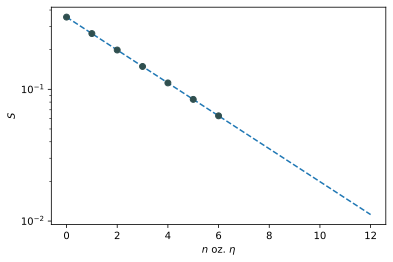

In [8]:
plt.xlabel('$n$ oz. $\eta$')
plt.yscale('log')
plt.ylabel('$S$')

η = np.linspace(0, 12, num=101)
plt.plot(η, S[0] * (3/4)**η, linestyle='--', zorder=-1)
plt.scatter(n, S, color='darkslategrey') and None